#Part 1

In [ ]:
#Press Runtime -> Run All to run, may take some time
!pip install git+https://github.com/ageitgey/face_recognition

  Cloning https://github.com/ageitgey/face_recognition to /tmp/pip-req-build-c_jbdpsn
  Running command git clone -q https://github.com/ageitgey/face_recognition /tmp/pip-req-build-c_jbdpsn
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
!pip install -v --install-option="--no" --install-option="DLIB_USE_CUDA" dlib

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/p

In [ ]:
!pip install opencv-python

In [ ]:
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.applications.resnet import ResNet101
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1VKrl_Ehig5q4b56ZUcQJzn5H0XofqxNS
!unzip /content/lfw.zip

In [ ]:
import keras
from keras.preprocessing import image

# Helper Function for Displaying Images
def loadImage(filePath):
    # Makes sure that the image from Dir is same as the model inference input (224x224)
    img = keras.preprocessing.image.load_img(filePath)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    # Return the Image as well as the NumPy Represenation
    return img, array

In [ ]:
import random
import os

numImages = 13223
images = []

dirString = "/content/lfw/"

for file in os.listdir(dirString):
    images.append(dirString + file)

In [ ]:
import tqdm
from tqdm import tqdm

encodings = []

# Get all of them 
for i, img in enumerate(tqdm(images)):
  image = face_recognition.load_image_file(img)
  imageEncoding = face_recognition.face_encodings(image)
  if(len(imageEncoding)==0):
    continue
  encodings.append(imageEncoding[0])

100%|██████████| 13251/13251 [14:27<00:00, 15.28it/s]


In [ ]:
# Find the closest Images by finding the most similar face_distance value
def closestImages(index, numResults=5):
  imageDistances = face_recognition.face_distance(encodings, encodings[index])
  retDist = np.argsort(imageDistances)[:numResults]
  return retDist

In [ ]:
# Downsizes the image and returns concatenated image if multiple are passed 
def resizeImages(imageList, titles=None, cols=5, rows=4):
    fig = plt.figure(figsize=(2 * cols, 2 * rows))
    for i in range(len(imageList)):
        fig.add_subplot(rows, cols, i + 1)
        img, array = loadImage(images[imageList[i]])
        plt.imshow(img)
        plt.axis('off')
        if titles is not None:
            plt.title(titles[i])
    plt.show()

In [ ]:
def query(index,numImages):
  img, arr = loadImage(images[index])
  plt.imshow(img)
  resizeImages(closestImages(index,numImages))

def randomQuery():
  randomNum = int(numImages * random.random())

  img, arr = loadImage(images[randomNum])
  plt.imshow(img)
  resizeImages(closestImages(randomNum,numImages))

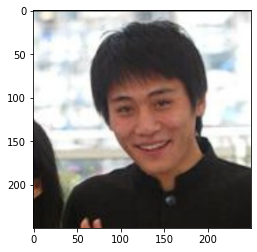

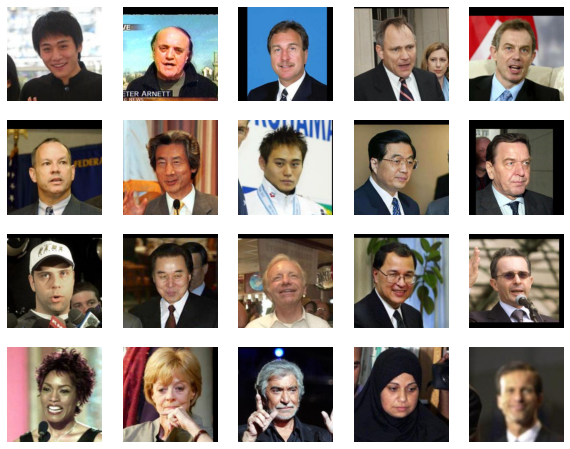

In [ ]:
query(200,20)

#Part 2

#External Library Setup


In [2]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.applications.resnet import ResNet101
import numpy as np
import matplotlib.pyplot as plt

#We will be using ResNet for ReverseSearch
model = ResNet101(weights='imagenet', include_top=True)

179658752/179648224 [==============================] - 2s 0us/step


In [ ]:
# Downloads the dataset folder and unzips
!gdown --id 1VKrl_Ehig5q4b56ZUcQJzn5H0XofqxNS
!unzip /content/lfw.zip

In [4]:
# Helper Function for Displaying Images
def loadImage(filePath):
    # Makes sure that the image from Dir is same as the model inference input (224x224)
    img = image.load_img(filePath, target_size=model.input_shape[1:3])
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    xarray = preprocess_input(array)
    # Return the Image as well as the NumPy Represenation
    return img, array

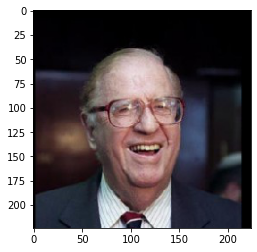

In [5]:
# Testing Helper Fucntion
img, array = loadImage("/content/lfw/Abba_Eban_0001.jpg")
plt.imshow(img)

In [6]:
from keras.models import Model

# We only want the features from the model, not its output
featureExtract = Model(inputs=model.input, outputs=model.get_layer("predictions").output)

In [7]:
import random
import os


numImages = 13223
images = []
dirString = "/content/lfw/"

# Get all of the filenames from the LFW Directory
for file in os.listdir(dirString):
    images.append(dirString + file)

In [8]:
import time
from tqdm import tqdm

# Infers and Appends the feature output of the model, benchmark at every 1000 for time elapse user reference
features = []
for i, image_path in enumerate(tqdm(images)):
    img, x = loadImage(image_path);
    feat = featureExtract.predict(x)[0]
    features.append(feat)
    if i % 1000 == 0:
      print("Image %d / %d." % (i, len(images)))

print("Feature Extraction Complete")

  0%|          | 3/13251 [00:10<10:10:37,  2.77s/it]

Image 0 / 13251.


  8%|▊         | 1003/13251 [01:22<14:12, 14.37it/s]

Image 1000 / 13251.


 15%|█▌        | 2003/13251 [02:34<12:57, 14.47it/s]

Image 2000 / 13251.


 23%|██▎       | 3002/13251 [03:48<26:14,  6.51it/s]

Image 3000 / 13251.


 30%|███       | 4003/13251 [05:05<10:58, 14.04it/s]

Image 4000 / 13251.


 38%|███▊      | 5003/13251 [06:17<09:38, 14.25it/s]

Image 5000 / 13251.


 45%|████▌     | 6003/13251 [07:32<09:15, 13.06it/s]

Image 6000 / 13251.


 53%|█████▎    | 7003/13251 [08:45<09:25, 11.05it/s]

Image 7000 / 13251.


 60%|██████    | 8003/13251 [09:58<06:26, 13.59it/s]

Image 8000 / 13251.


 68%|██████▊   | 9001/13251 [11:10<04:57, 14.29it/s]

Image 9000 / 13251.


 75%|███████▌  | 10003/13251 [12:23<03:56, 13.75it/s]

Image 10000 / 13251.


 83%|████████▎ | 11003/13251 [13:35<02:38, 14.15it/s]

Image 11000 / 13251.


 91%|█████████ | 12003/13251 [14:47<01:26, 14.35it/s]

Image 12000 / 13251.


 98%|█████████▊| 13003/13251 [16:04<00:17, 14.33it/s]

Image 13000 / 13251.


100%|██████████| 13251/13251 [16:22<00:00, 13.49it/s]

Feature Extraction Complete


In [9]:
from sklearn.decomposition import PCA

# We are going to use principal component analysis (PCA) to find only the most highly correletated features for each of the images 
# We are only going to go with 300 componenets primarily due to processor restrictions
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [31]:
from scipy.spatial import distance

# Retrieves the closest images to a given image, by default returns 5 images 
def getClosestImages(imageIndex, numResults=5):
    # Iterates over the features list and returns a list of distances from features
    distances = [ distance.cosine(pca_features[imageIndex], feat) for feat in pca_features ]
    # Sort Images list by closest to furthest and return a list of the closest numResults images 
    closestImages = sorted(range(len(distances)), key=lambda k: distances[k])[1:numResults+1]
    return closestImages

# Downsizes the image and returns concatenated image if multiple are passed 
def downsizeImages(ImageQ, newSize):
    imgs = []
    for i in ImageQ:
        img = image.load_img(images[i])
        img = img.resize((int(img.width * newSize / img.height), newSize))
        imgs.append(img)
    retImage = np.concatenate([np.asarray(i) for i in imgs], axis=1)
    return retImage

def showImages(imageList, titles=None, cols=5, rows=4):
    fig = plt.figure(figsize=(2 * cols, 2 * rows))
    for i in range(len(imageList)):
        fig.add_subplot(rows, cols, i + 1)
        img, array = loadImage(images[imageList[i]])
        plt.imshow(img)
        plt.axis('off')
        if titles is not None:
            plt.title(titles[i])
    plt.show()

def randomQuery():
  # Generate random image to query into our model
  randomImg = int(numImages * random.random())
  query_image = downsizeImages([randomImg], 300)
  results_image = downsizeImages(getClosestImages(randomImg,10), 200)

  # Plot Query Image
  plt.figure(figsize = (5,5))
  plt.imshow(query_image)
  plt.title("Query Image (%d)" % randomImg)

  # Plot Similar Images
  plt.figure(figsize = (16,12))
  plt.imshow(results_image)
  plt.title("Similar Images")

def regularQuery(index):
  # Generate image to query into our model
  query_image = downsizeImages([index], 300)
  results_image = downsizeImages(getClosestImages(index,10), 200)

  # Plot Query Image
  plt.figure(figsize = (5,5))
  plt.imshow(query_image)
  plt.title("Query Image (%d)" % index)

  # Plot Similar Images
  plt.figure(figsize = (16,12))
  plt.imshow(results_image)
  plt.title("Similar Images")

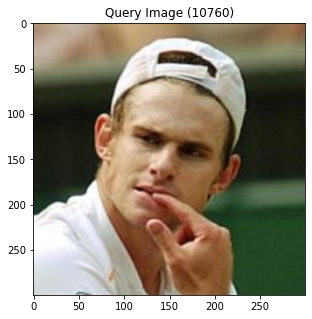

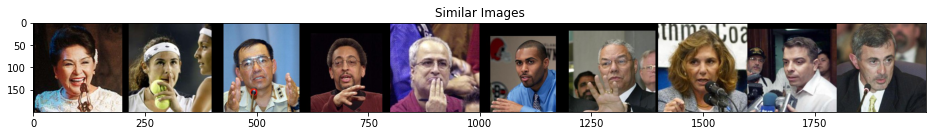

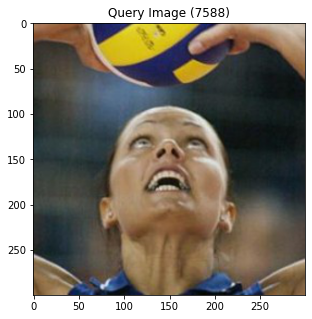

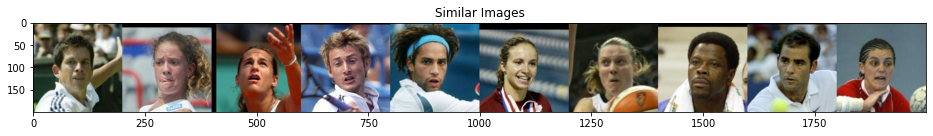

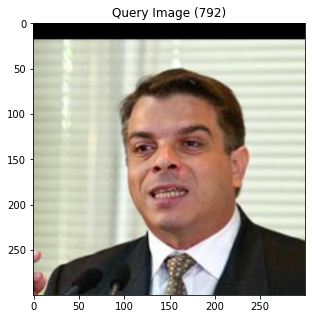

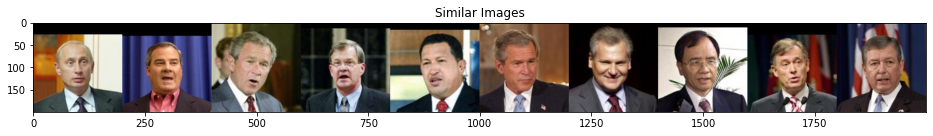

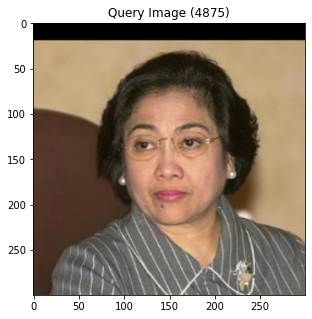

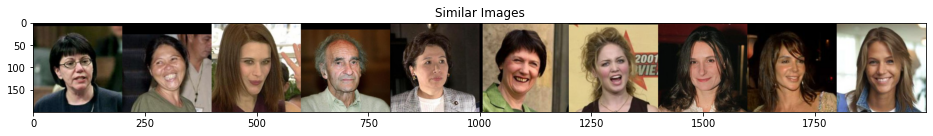

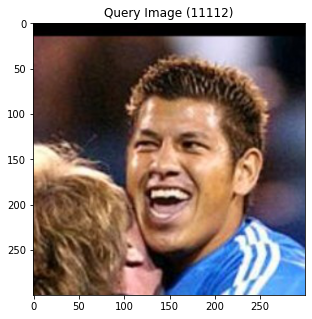

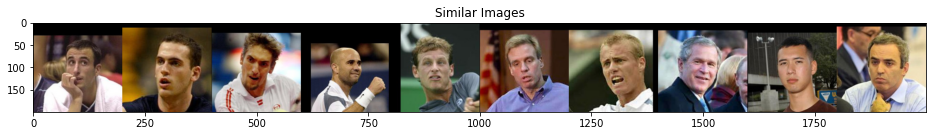

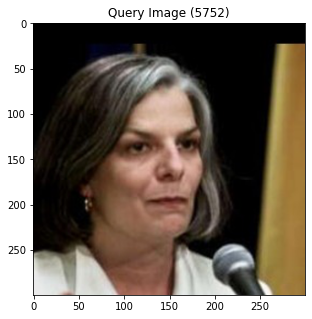

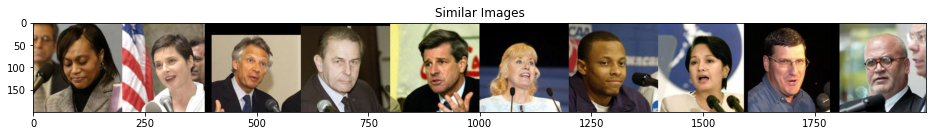

In [36]:
# Querying the Model
regularQuery(10760)
for i in range(5):
  randomQuery()